
# Comparative study of the introduction of white noise and the $L_2$ regularization



Developed by: Fernanda Avendaño, Diego Quezada and Kevin Reyes.



## 1. Hypothesis

 We know that training a linear model by adding white noise to the attributes is mathematically equivalent to using the $L_2$ regularizer. In practice, however, the first method is much more effective.



## 2. Introduction

 In order to better understand this research, it is axiomatic to understand the following concepts:
1.  Regularization $L_{2}$: Also known as Ridge regularization, it is a penalty that seeks to proportionally reduce the value of the coefficients of the model, in such a way that by reducing these, the correlation between the attributes is minimized and obtain a better generalization and therefore reduce the associated overfitting.
1.  White noise: It is a disturbance generated from a probability distribution centered at 0.

 In this research we will study the difference in performance between training a model using $L_2$ regularization and training a model on noisy data.

 The main motivation of this research is to discover the implications of white noise and $L_2$ regularization in the generalization capacity of linear regression models, as well as to empirically demonstrate the relationship between white noise and $L_2 regularization $ described in (1).



## 3. Methodology

 The methodology that will allow us to gather evidence to test the hypothesis described above is as follows:

 For each dataset, repeat the following procedure $n$ times starting from step 2 with a constant standard deviation $\sigma$ for white noise:
1.  Define a training and test set. To guarantee reproducibility, the same training and testing set is used throughout the $n$ iterations for each dataset.
1.  Define a noisy training set.
1.  Define a $\lambda$ value for the regularization.
1.  Train linear regressor 1 on the noisy training set.
1.  Train linear regressor 2 on the original training set using L2 regularization with parameter $\lambda$.
1.  Calculate the root mean square error associated with each regressor.
1.  Store both errors.



## 4. Computational simulation



### 4.1 Importing libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%load_ext autoreload
%autoreload 2
from styles import *



We will work with the following three datasets:
1.  [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) : This dataset contains 1599 records of 11 physical-chemical properties that seek to explain the quality of "Vinho Verde" wine.
1.  [Real estate](https://www.kaggle.com/quantbruce/real-estate-price-prediction) : This data set contains 414 records of 7 characteristics that seek to predict the value of real estate.
1.  [Graduate Admission 2](https://www.kaggle.com/mohansacharya/graduate-admissions) : This data set contains 400 records of 8 characteristics that seek to predict the probability of admission to master&#39;s programs.


In [3]:
wine_quality = pd.read_csv("./datasets/wine_quality.csv")


In [4]:
real_estate = pd.read_csv("./datasets/real_estate.csv")


In [5]:
admission = pd.read_csv("./datasets/admission.csv")



### 4.3 Brief exploration



Using the `head` we can see a sample of data from each dataset:


In [6]:
wine_quality.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
real_estate.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
admission.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65



No NaN values are present in any dataset:


In [9]:
print(
    wine_quality.isnull().values.any(),
    real_estate.isnull().values.any(),
    admission.isnull().values.any(),
)


False False False



### 4.2 Sample generation



The set of features and target to be used for each of the datasets is defined below:


In [10]:
data = {
    "wine_quality": (
        [
            "fixed acidity",
            "volatile acidity",
            "citric acid",
            "residual sugar",
            "chlorides",
            "free sulfur dioxide",
            "total sulfur dioxide",
            "density",
            "pH",
            "sulphates",
            "alcohol",
        ],
        "quality",
    ),
    "real_estate": (
        [
            "No",
            "X1 transaction date",
            "X2 house age",
            "X3 distance to the nearest MRT station",
            "X4 number of convenience stores",
            "X5 latitude",
            "X6 longitude",
        ],
        "Y house price of unit area",
    ),
    "admission": (
        [
            "GRE Score",
            "TOEFL Score",
            "University Rating",
            "SOP",
            "LOR ",
            "CGPA",
            "Research",
        ],
        "Chance of Admit ",
    ),
}



The `add_noise` function is responsible for applying a Gaussian noise to the `features` columns of the `dataset` dataframe. We will apply a noise centered at 0 and with the same variance to each of the attributes as indicated in (2):


In [11]:
def add_noise(dataset, features, sigma):
    for i, feature in enumerate(features):
        dataset[feature] = dataset[feature].apply(
            lambda x: x + sigma * np.random.randn()
        )
    return dataset



The `generate_sample` function is responsible for generating the error data indicated in step 5 of our methodology:


In [12]:
def generate_sample(datasets, data, x_limits, n=5):
    errors = dict()
    sigma = 2
    for i, (name, dataset) in enumerate(datasets.items()):
        alphas = np.linspace(0, x_limits[i], n)
        training_data = {"sigmas": [], "lambdas": [], "noisy_error": [], "l2_error": []}
        # Paso 1
        X_train, X_val, y_train, y_val = train_test_split(
            dataset[data[name][0]],
            dataset[data[name][1]],
            test_size=0.6,
            random_state=21,
        )
        for i in range(n):
            # Paso 2
            X_train_noisy = add_noise(X_train.copy(), data[name][0], sigma)
            # Paso 3
            alpha = alphas[i]
            # Paso 4
            noisy_model = LinearRegression()
            noisy_model = noisy_model.fit(X_train_noisy, y_train)
            # Paso 5
            l2_model = Ridge(alpha=alpha)
            l2_model = l2_model.fit(X_train, y_train)
            # Paso 6
            noisy_predict = noisy_model.predict(X_val)
            l2_predict = l2_model.predict(X_val)
            noisy_error = mean_squared_error(y_val, noisy_predict)
            l2_error = mean_squared_error(y_val, l2_predict)
            # Paso 7
            training_data["sigmas"].append(sigma)
            training_data["lambdas"].append(alpha)
            training_data["noisy_error"].append(noisy_error)
            training_data["l2_error"].append(l2_error)
        errors[name] = training_data
    return errors


In [13]:
datasets_dict = {
    "wine_quality": wine_quality,
    "real_estate": real_estate,
    "admission": admission,
}



The data associated with the computational simulation is generated below:


In [14]:
errors = generate_sample(datasets_dict, data, x_limits=[10000, 2000, 2000], n=100)



Then, we get the average error per dataset for each of the models (noisy and l2):


In [15]:
def get_mean_error_per_dataset(errors, datasets):
    mean_errors = list()
    for dataset in datasets.keys():
        mean_errors.append(
            [
                np.mean(errors[dataset]["noisy_error"]),
                np.mean(errors[dataset]["l2_error"]),
            ]
        )
    return mean_errors


In [16]:
mean_errors = get_mean_error_per_dataset(errors, datasets_dict)


In [17]:
mean_errors


[[0.583110810975046, 0.5892437400838518],
 [78.57300030895344, 78.96957613779314],
 [0.005961246498355441, 0.0059768887653140436]]


Finally, graphs are presented where the values of $\lambda$ are shown such that the performance between the model with regularization $L_2$ and the model with noisy features is equal (the difference of their errors is 0) :


In [18]:
def plot_scatter(x, y, title="", figsize=(10, 4), xlabel="x", ylabel="y"):
    fig = plt.figure(figsize=figsize)
    ax = plt.axes()
    ax.plot(x, y, "o")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


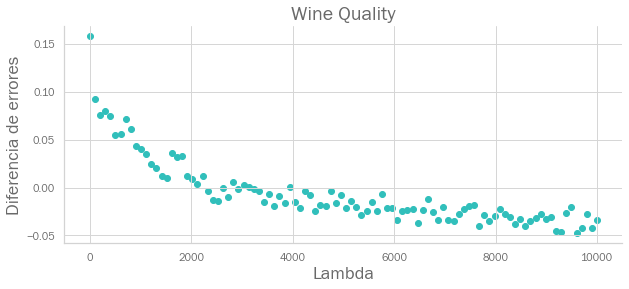

In [19]:
dataset = "wine_quality"
plot_scatter(
    errors[dataset]["lambdas"],
    np.array(errors[dataset]["noisy_error"]) - np.array(errors[dataset]["l2_error"]),
    title="Wine Quality",
    xlabel="Lambda",
    ylabel="Diferencia de errores",
)


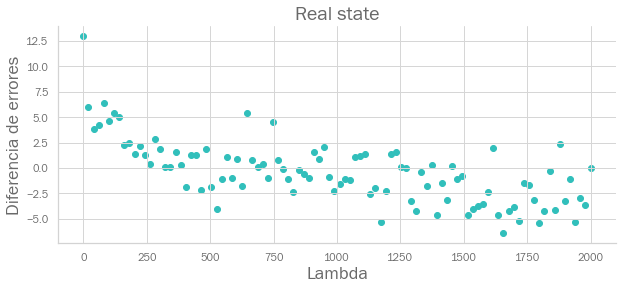

In [20]:
dataset = "real_estate"
plot_scatter(
    errors[dataset]["lambdas"],
    np.array(errors[dataset]["noisy_error"]) - np.array(errors[dataset]["l2_error"]),
    title="Real state",
    xlabel="Lambda",
    ylabel="Diferencia de errores",
)


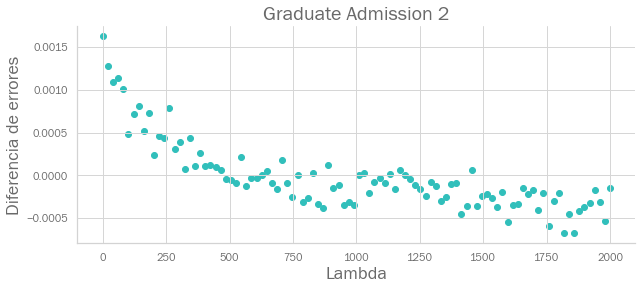

In [21]:
dataset = "admission"
plot_scatter(
    errors[dataset]["lambdas"],
    np.array(errors[dataset]["noisy_error"]) - np.array(errors[dataset]["l2_error"]),
    title="Graduate Admission 2",
    xlabel="Lambda",
    ylabel="Diferencia de errores",
)



### 4.3 Conclusions


1. We reject the hypothesis: although the model trained with $L_2$ regularization has a higher MSE for the three datasets, the difference is minimal, so the average performance is practically the same.


In [ ]:
print([error[0] < error[1] for error in mean_errors])


[True, True, True]


In [ ]:
print([error[1] - error[0] for error in mean_errors])


[0.006132929108805807, 0.3965758288397012, 1.5642266958602533e-05]


1. What is stated in (2) is verified experimentally: in the three datasets there are $\lambda$ values such that the effectiveness of the models, measured through the MSE, is the same.



### 4.4 References
1.  Bishop CM. Training with Noise is Equivalent to Tikhonov Regularization. Neural Computation 7 No. 1 (1995).
